In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Single Variable

In [76]:
singel_data = pd.read_csv('RegData.csv', header=None)
singel_data.head()


,0,1
0,2.9,4.0
1,6.7,7.4
2,4.9,5.0
3,7.9,7.2
4,9.8,7.9


In [14]:
singel_data.iloc[:,0].values

array([2.9000001 , 6.69999981, 4.9000001 , 7.9000001 , 9.80000019,
       6.9000001 , 6.0999999 , 6.19999981, 6.        , 5.0999999 ,
       4.69999981, 4.4000001 , 5.80000019])

In [22]:
m,n = singel_data.shape
thetas = np.zeros((n, 1))  
x0 = np.ones((m,1))
X = np.c_[x0, singel_data.iloc[:,0].values]

Y = singel_data.iloc[:,1].values.reshape(-1,1)
print(X.shape, thetas.shape)
y_hat = X @ thetas
print(y_hat.shape)

print(Y.shape)
error = y_hat - Y
print((X.T).shape , error.shape)
((X.T @ error))

(13, 2) (2, 1)
(13, 1)
(13, 1)
(2, 13) (13, 1)


array([[ -72.39999962],
       [-455.56999856]])

In [22]:
for i in range(0, 1000, 100):
    print(i)

0
100
200
300
400
500
600
700
800
900


# Mini Batch Gradient Descent 
![Formula](https://miro.medium.com/proxy/0*OUP4nPolDo1yt5cY)


In [110]:
def mini_batch_GD_alg(X, Y, alpha = 0.01, b = 10, itr = 1e6, bias=True):
    # *************** shuffel Data ***************
    data_shuff = pd.concat((X, Y), axis=1)
    np.random.shuffle(data_shuff.values)

    X = data_shuff.values[:, :-1]
    Y = data_shuff.values[:, -1]


    # *************** Step 1 ***************
    if len(X.shape) > 1:
        m,n = X.shape
    else:
        m = X.shape[0]
        n = 1
    if bias:
        thetas = np.zeros((n+1, 1))  
        x0 = np.ones((m,1))
        X = np.c_[x0, X]
        Y = Y.reshape(-1,1)
    else:
        thetas = np.zeros((n, 1))  
        Y = Y.reshape(-1,1)
    # if b > 0:
    #     epoch = int(m/b)  
    b = int(b)
    thetas_history = []
    loss_history = []
    
    flag = False
    for _ in range(int(itr)):

        # ************* Loop on all data *************
        for i in range(0, m+1,b):
            X_slice = X[i:b+i,:]
            Y_slice = Y[i:b+i]
            # *************** Step 2 ***************
            y_hat = X_slice @ thetas # X(n,m) @ thetas(n,1)


            # *************** Step 3 ***************
            error = y_hat - Y_slice
            J = ((error.T @ error).item())/(2*b) # error.T(1,m) error(m,1) = (1,1)


            # ************ stop condtion ************
            if len(thetas_history) > 2:
                if np.abs(loss_history[-1]-loss_history[-2]) < 0.001:
                    flag = True
                    break
            loss_history.append(J)
            thetas_history.append(thetas)

            
            # *************** Step 4 ***************
            G_thetas = (X_slice.T @ error)/b  # X(n,m) @ error(m,1) = (n,1)


            # *************** Step 5 ***************
            thetas = thetas - alpha * G_thetas
        
        if flag:
            break

    h = X @ thetas
    return h, thetas, thetas_history, loss_history

In [106]:
h, ths, ths_hist, loss_hist = mini_batch_GD_alg(singel_data.iloc[:,0], singel_data.iloc[:,1], alpha = 0.001, b=1 ,itr = 1e6, bias=True)

In [108]:
np.abs(loss_hist[-1]-loss_hist[-2])

4.955532378336791e-05

-0.27438469019751976

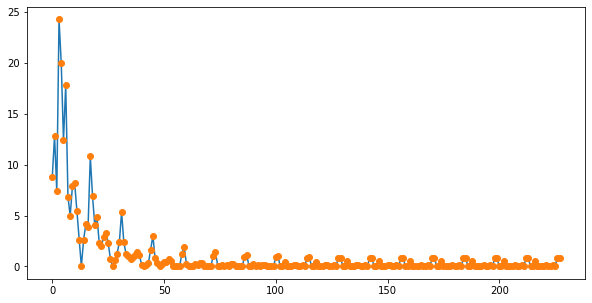

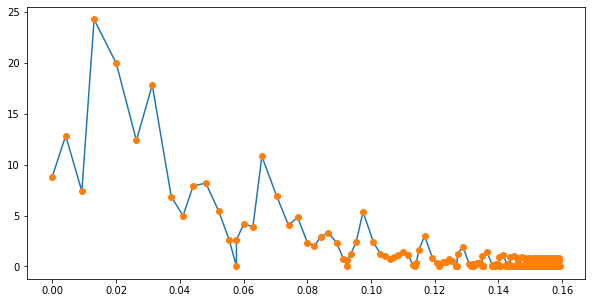

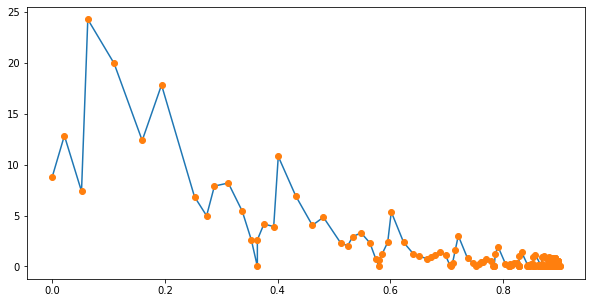

In [107]:
plt.figure(figsize=(10,5))
plt.plot(loss_hist)
plt.plot(loss_hist, 'o')
plt.figure(figsize=(10,5))
plt.plot(np.array(ths_hist)[:,0], loss_hist)
plt.plot(np.array(ths_hist)[:,0], loss_hist, 'o')
plt.figure(figsize=(10,5))
plt.plot(np.array(ths_hist)[:,1], loss_hist)
plt.plot(np.array(ths_hist)[:,1], loss_hist, 'o')

r2_score(singel_data.iloc[:,1], h)

# Multi Variable

In [62]:
multi_data = pd.read_csv('MultipleLR.csv', header=None)
multi_data


,0,1,2,3
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142
5,53,46,55,101
6,69,74,77,149
7,47,56,60,115
8,87,79,90,175
9,79,70,88,164


In [52]:
multi_data.drop([3], axis=1).values.shape

(25, 3)

In [48]:
multi_data[3].values.reshape(-1,1).shape

(25, 1)

In [71]:
data_shuff = pd.concat((multi_data.drop([3], axis=1), multi_data[3]), axis=1)
np.random.shuffle(data_shuff.values)

X = data_shuff.values[:, :-1]
Y = data_shuff.values[:, -1]

In [73]:
print(Y)

[192 196 152 148 101 192 149 175 164 159 115 177 175 183 175 177 184 152
 185 180 149 141 147 141 142]


In [38]:
b = 10
e = multi_data.shape[0]//b # 25/10 =2.5 = 2
for i in range(0, 25+1, b):
    print(i, '--', b+i)
    print(multi_data[3].values.reshape(-1,1)[i:b+i])
    print()

0 -- 10
[[152]
 [185]
 [180]
 [196]
 [142]
 [101]
 [149]
 [115]
 [175]
 [164]]

10 -- 20
[[141]
 [141]
 [184]
 [152]
 [148]
 [192]
 [147]
 [183]
 [177]
 [159]]

20 -- 30
[[177]
 [175]
 [175]
 [149]
 [192]]



In [111]:
h, ths, ths_hist, loss_hist = mini_batch_GD_alg(multi_data.drop([3], axis=1), multi_data.iloc[:,3], alpha = 0.000003, b=1 , itr = 1e6, bias=True)

In [189]:
ths

array([[0.0033522 ],
       [0.449246  ],
       [0.51897415],
       [1.0475178 ]])

-0.5174144943647065

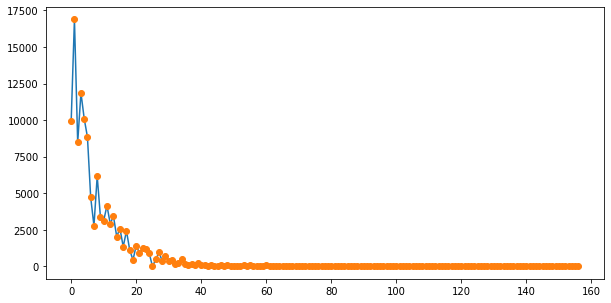

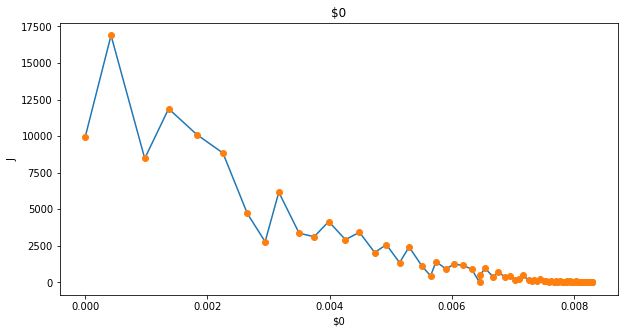

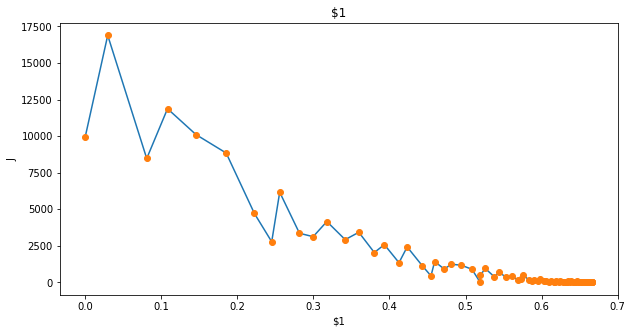

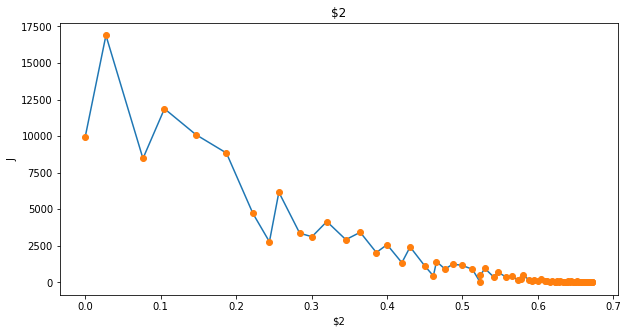

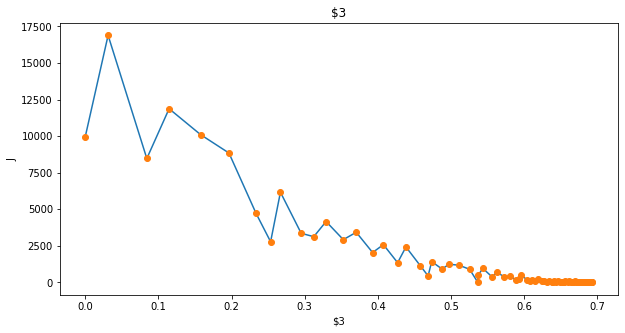

In [112]:
plt.figure(figsize=(10,5))
plt.plot(loss_hist)
plt.plot(loss_hist, 'o')

for i in range(ths.shape[0]):

    plt.figure(figsize=(10,5))
    plt.plot(np.array(ths_hist)[:,i], loss_hist)
    plt.plot(np.array(ths_hist)[:,i], loss_hist, 'o')
    plt.title(f'${i}')
    plt.xlabel(f'${i}')
    plt.ylabel('J')

r2_score(multi_data.iloc[:,3], h)

-1.4051997793059083

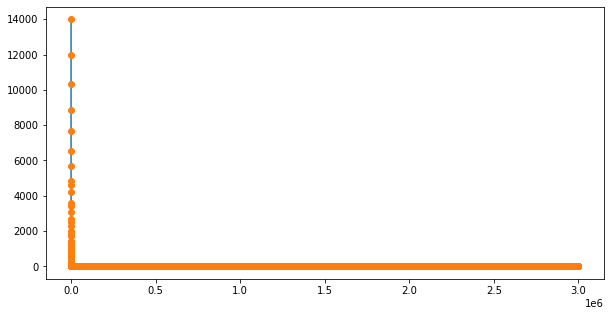

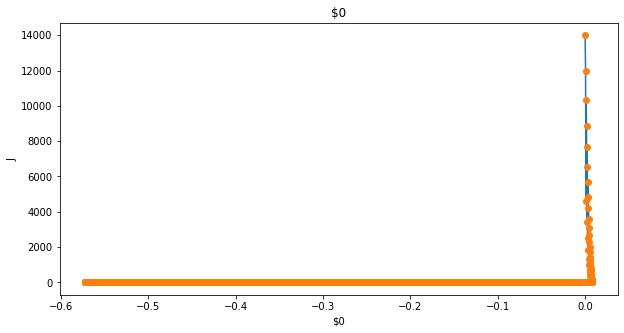

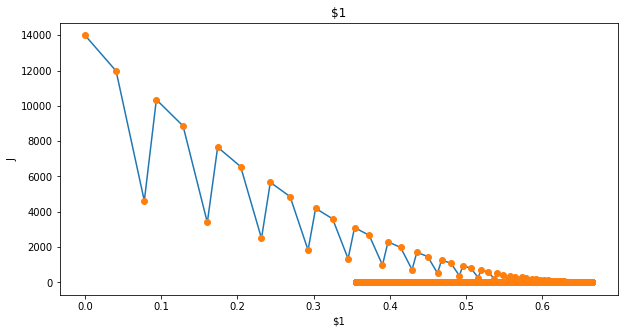

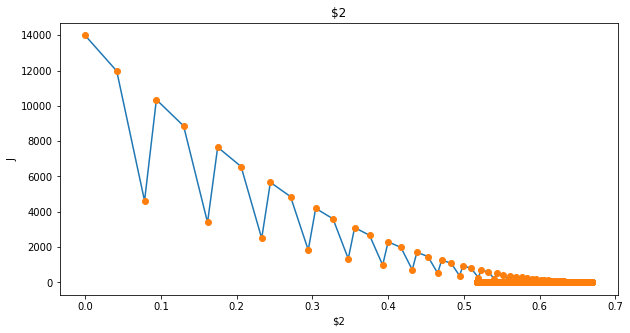

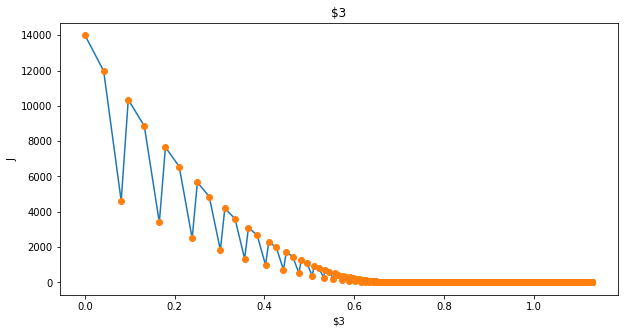

In [117]:
h, ths, ths_hist, loss_hist = mini_batch_GD_alg(multi_data.drop([3], axis=1), multi_data.iloc[:,3], alpha = 0.000003, b=10 , itr = 1e6, bias=True)
plt.figure(figsize=(10,5))
plt.plot(loss_hist)
plt.plot(loss_hist, 'o')

for i in range(ths.shape[0]):

    plt.figure(figsize=(10,5))
    plt.plot(np.array(ths_hist)[:,i], loss_hist)
    plt.plot(np.array(ths_hist)[:,i], loss_hist, 'o')
    plt.title(f'${i}')
    plt.xlabel(f'${i}')
    plt.ylabel('J')

r2_score(multi_data.iloc[:,3], h)